In [4]:
# coding: utf-8

# In[20]:
import tensorflow as tf

from pathlib import Path
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from pathlib import Path
import math

np.set_printoptions(threshold=np.nan)

path_model = "./model"


# file_image=r"D:\DatasetJapanese\data_katagana\katakana_test\a_k\01400.png"

def convert_image_to_input(file_image):
    img_size = 64
    num_channels = 3
    file_image = str(file_image)
    images = []
    img = cv2.imread(file_image, 0)
    cv2.imwrite(file_image, img)

    img = cv2.imread(file_image)
    img = cv2.resize(img, (img_size, img_size))
    img = img.astype(np.float32)
    img = np.multiply(img, 1.0 / 255.0)

    images.append(img)

    images = np.array(images)
    #     print(images.shape)

    x_batch = images.reshape(-1, img_size, img_size, num_channels)
    # print(x_batch.shape)

    return x_batch


# In[22]:

class Test(object):
    def __init__(self):
        self.sess = tf.Session()
        path_model_last = tf.train.latest_checkpoint(".\model")
        saver = tf.train.import_meta_graph(path_model_last +".meta", clear_devices=True)
#         print("init__: ",path_model)
#         p = Path(path_model)
#         print(p.absolute())
        saver.restore(self.sess, path_model_last)

        self.graph = tf.get_default_graph()
        self.x = self.graph.get_tensor_by_name("inputs/x:0")
    
    
    def listOfTensor(self):
        for tensor in self.graph.as_graph_def().node:
            print(tensor.name)
#         for op in self.graph.get_operations():
#             print (str(op.name)) 

    def print_layer(self, path_image):
        path_image = str(path_image)
        
        x_batch = convert_image_to_input(path_image)
        layer = self.graph.get_tensor_by_name("conv1/conv1:0")
        
        layer = self.sess.run(layer,feed_dict={self.x:x_batch})
        #prin(layer.shpae) #[?,64,64,channel] ?: amount input
        num_filters = layer.shape[3]
        
        num_grids = math.ceil(math.sqrt(num_filters))
        
        fig, axes = plt.subplots(num_grids, num_grids)
        for i, ax in enumerate(axes.flat):
            if i<num_filters:
                img = layer[0, :, :, i]

                ax.imshow(img, interpolation='nearest', cmap='binary')
            ax.set_xticks([])
            ax.set_yticks([])
    
        plt.show()
    
    def print_weight(self):
        w= self.graph.get_tensor_by_name("conv1/weights/conv1_weights:0")
        print(w.shape) #(3, 3, 3, 32) width, height, deep, channel
        w=self.sess.run(w)
        print(w[:,:,0,0])
        w_min = np.min(w)
        w_max=np.max(w)
        num_filters = w.shape[3]
        
        num_grids = math.ceil(math.sqrt(num_filters)) # lấy trần
        
        fig, axes = plt.subplots(num_grids, num_grids)
        for i, ax in enumerate(axes.flat):
            if i<num_filters:
                img = w[:, :, 0, i]

                ax.imshow(img, vmin=w_min, vmax=w_max,
                          interpolation='nearest', cmap='seismic' ) #cmap: seismic, binary
            ax.set_xticks([])
            ax.set_yticks([])
    
        plt.show()
    def predict(self,file_image):
        
        y_pred = self.graph.get_tensor_by_name("Test/y_pred:0")

        
        # y_true = graph.get_tensor_by_name("y_true:0")

        x_batch = convert_image_to_input(file_image)
        result = self.sess.run(y_pred, feed_dict={self.x: x_batch})
        # print(result)
        # print(np.argmax(result,1 ))
        return result



INFO:tensorflow:Restoring parameters from .\model\modelxxx.ckpt-60
[[0.23643786 0.06785738 0.17596512 0.07000634 0.18154608 0.05157895
  0.15345457 0.06315372]]


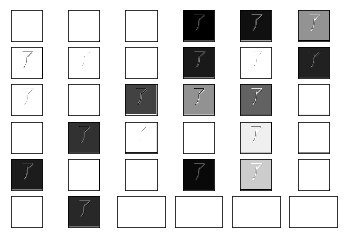

(3, 3, 3, 32)
[[-0.08801375 -0.01169209 -0.07945956]
 [-0.08555804  0.04439848 -0.03712479]
 [-0.08778787  0.0181228  -0.04715258]]


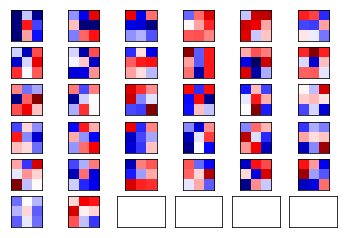

In [5]:
file_image = r"D:\DatasetJapanese\data_katagana\katakana_test\a_k\01400.png"
file_2 = r".\a.png"
t=Test()

# t.listOfTensor()

print(t.predict(file_2))
t.print_layer(file_2)
t.print_weight()

In [7]:
file_2 = r".\a.png"
img=cv2.imread(file_2,0)
cv2.imshow("image",img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
55000/100


550.0